<a href="https://colab.research.google.com/github/gorselli14/Portifolio_Projetos/blob/master/Mod2%20-%20An%C3%A1lise_A%C3%A7%C3%B5es_Tupperware.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisando as ações da Tupperware com Pandas


In [54]:
#importandp Pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Importanção dos dados e análise do dataset

Os dados que serão analisados abaixo, foram obtidos do site do Yahoo Finance, considerando o intervalo entre Janeiro de 2010 e Julho de 2020.

<img alt="Tupperware yahoo Finance" width="70%" src=https://raw.githubusercontent.com/gorselli14/Dados/master/Tupperware/Yahoo_Fin_TW_v2.PNG>

In [3]:
#Importando dataframe
df = pd.read_csv('https://raw.githubusercontent.com/gorselli14/Dados/master/Tupperware/TUP_2010_2020.csv')
print(df)

            Date       Open       High  ...      Close  Adj Close   Volume
0     2010-01-04  47.209999  48.400002  ...  47.950001  32.726307   721000
1     2010-01-05  48.259998  48.830002  ...  48.290001  32.958382   738100
2     2010-01-06  48.369999  49.220001  ...  48.660000  33.210899   575000
3     2010-01-07  48.439999  48.790001  ...  48.189999  32.890118   528000
4     2010-01-08  48.150002  48.240002  ...  47.799999  32.623947   527600
...          ...        ...        ...  ...        ...        ...      ...
2638  2020-06-26   4.410000   4.470000  ...   4.290000   4.290000  2865700
2639  2020-06-29   4.160000   4.700000  ...   4.700000   4.700000  2854900
2640  2020-06-30   4.710000   4.870000  ...   4.750000   4.750000  2463800
2641  2020-07-01   4.760000   5.700000  ...   5.580000   5.580000  5701900
2642  2020-07-02   5.790000   5.970000  ...   5.590000   5.590000  2791700

[2643 rows x 7 columns]


In [4]:
#visualizar a dimensão do Dataframe
print(df.shape)
print(f'Quantidade de linhas {df.shape[0]}')
print(f'Quantidade de colunas {df.shape[1]}')

(2643, 7)
Quantidade de linhas 2643
Quantidade de colunas 7


In [ ]:
#Ulitizando df.info() é fácil visualizar se existem informações em branco em cada coluna, além do tipo de dado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2643 entries, 0 to 2642
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2643 non-null   object 
 1   Open       2643 non-null   float64
 2   High       2643 non-null   float64
 3   Low        2643 non-null   float64
 4   Close      2643 non-null   float64
 5   Adj Close  2643 non-null   float64
 6   Volume     2643 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 144.7+ KB


##Convertendo a coluna Date
Conforme mostrado no médito info(), a coluna Date originalmente foi importada com o formato `object`, dessa forma não é possível utilizar essa informação adequadamente.
Convertendo essa coluna para o formato de data, será possivel realizar agrupamentos por períodos distintos.

In [6]:
#convertendo para o formato de data
#informar em qual coluna a conversão será gravada, informar qual coluna será convertida e informar o formato como a data está descrita na coluna original
df.Date = pd.to_datetime(df['Date'],format='%Y-%m-%d')

In [7]:
#agora aparece no formato de data (Dtype = datetime64[ns])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2643 entries, 0 to 2642
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2643 non-null   datetime64[ns]
 1   Open       2643 non-null   float64       
 2   High       2643 non-null   float64       
 3   Low        2643 non-null   float64       
 4   Close      2643 non-null   float64       
 5   Adj Close  2643 non-null   float64       
 6   Volume     2643 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 144.7 KB


##Analisando os dados das ações da Tupperware


Apare seguir com as análises, vou criar um novo dataframe, somente com as colunas Date, Open e Close.
Vou utilizar essas informações para calcular a variação % das ações em cada dia.

No *DataFrame* `df_clean` teremos a seguinte informação:


*   **Date**: data da negocição das ações
*   **Open**: valor das ações na abertura do mercado
*   **Close**: valor das ações no fechamento do mercado
*   **Variation %**: percentual de variação da ação no dia



In [33]:
#criando o dataframe com as colunas que vou utilizar
df_clean = pd.DataFrame(df, columns=['Date','Open','Close'])
df_clean['Variation %'] = ((df_clean['Close']-df_clean['Open'])/df_clean['Open'])*100

In [34]:
#Resumo estatístico
df_clean.describe()

,Open,Close,Variation %
count,2643.000000,2643.000000,2643.000000
mean,54.036557,54.031139,-0.022292
std,20.934043,20.942174,2.825428
min,1.310000,1.250000,-34.210526
25%,44.669998,44.405000,-0.893617
50%,57.349998,57.349998,0.032058
75%,65.754998,65.700001,0.877281
max,96.440002,96.000000,43.750000


In [130]:
print(f'Maior valor da ação desde 2010: U${df_clean["Open"].max():.2f}')
print(f'Maior variação: {df_clean["Variation %"].max():.2f}%')
print(f'Menor valor da ação desde 2010: U${df_clean["Close"].min()}')
print(f'Maior variação Negativa: {df_clean["Variation %"].min():.2f}%')

Maior valor da ação: U$96.44
Maior variação: 43.75%
Menor valor da ação: U$1.25
Maior variação Negativa: -34.21%


Histograma do valor de fechamento das ações Tupperware nos últimos 10 anos


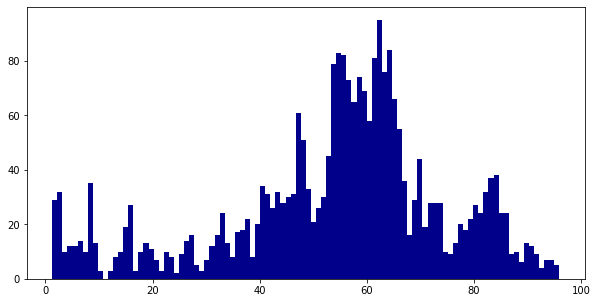

In [133]:
print('Histograma do valor de fechamento das ações Tupperware nos últimos 10 anos')
df_clean["Close"].hist(bins=100, figsize=(10,5), color='darkblue', grid=False)

Histograma do % de variação das ações da Tupperware nos últimos 10 anos


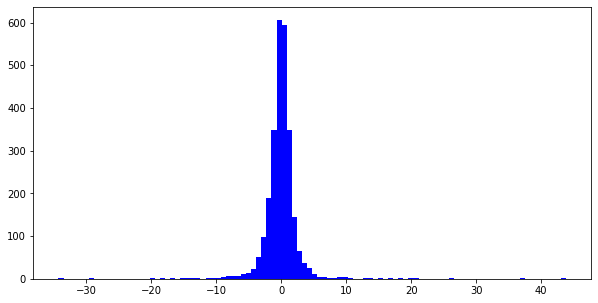

In [ ]:
print('Histograma do % de variação das ações da Tupperware nos últimos 10 anos')
df_clean['Variation %'].hist(bins=100, figsize=(10,5), color='Blue', grid=False)

In [134]:
#Media dos valores das colunas em cada ano
df_clean.groupby(df_clean["Date"].dt.year).mean()

,Open,Close,Variation %
Date,,,
2010,44.907619,44.908492,0.021008
2011,58.704841,58.723770,0.047093
2012,58.391480,58.412600,0.039977
2013,82.434127,82.499484,0.091609
2014,76.925079,76.825714,-0.113912
2015,61.656865,61.643254,-0.019448
2016,57.535079,57.606984,0.144352
2017,62.935857,62.949442,0.032845
2018,42.271474,42.171673,-0.203409


In [126]:
print('Data da MAIOR cotação da ação da Tupperware')
df_clean.loc[df_clean["Open"].idxmax()]

Data da MAIOR cotação da ação da Tupperware


Date           2013-12-26 00:00:00
Open                         96.44
Close                        95.54
Variation %              -0.933224
Name: 1002, dtype: object

In [131]:
print('Data da MENOR cotação da ação da Tupperware')
df_clean.loc[df_clean["Close"].idxmin()]

Data da MENOR cotação da ação da Tupperware


Date           2020-03-16 00:00:00
Open                           1.9
Close                         1.25
Variation %               -34.2105
Name: 2566, dtype: object

In [146]:
varia = ((df_clean['Open'].max()-df_clean['Close'].min())/df_clean['Open'].max())*100
print (f'Perda de {varia:.2f}% do valor da ação, considerando o maior e o menor valor.')

Perda de 98.70% do valor da ação, considerando o maior e o menor valor.


In [162]:
print(f'Primeiro valor da ação em 2010: U${df_clean.iloc[0,1]:.2f}')
print(f'Valor atual da ação: U${df_clean.iloc[-1,2]}')

Primeiro valor da ação em 2010: U$47.21
Valor atual da ação: U$5.59
